In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r"C:\Users\USER\Desktop\CognoRise Infotech\marketing_campaign.xlsx")

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
data = data.drop(columns=['ID', 'Dt_Customer'])

In [7]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [8]:
# Handling missing values if any
data = data.dropna()

In [9]:
# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)  
data['Cluster'] = kmeans.fit_predict(scaled_data)

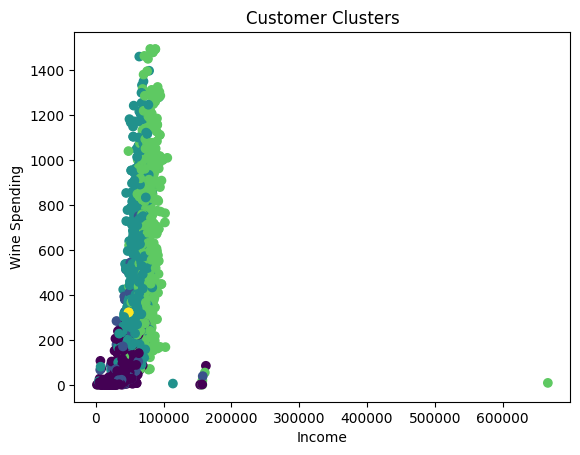

In [13]:
# Visualize the clusters
plt.scatter(data['Income'], data['MntWines'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.title('Customer Clusters')
plt.show()

In [14]:
# Analyze the clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1971.899543  34444.071918  0.796804  0.439498  49.940639   41.562785   
1        1968.355649  42665.041841  0.648536  0.589958  46.953975  137.740586   
2        1964.204225  59578.755282  0.183099  0.917254  48.174296  491.496479   
3        1968.871940  78102.372881  0.041431  0.133710  49.478343  615.706215   
4        1973.000000  48432.000000  0.000000  1.000000   3.000000  322.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0         5.328767        24.086758         8.303653          5.473744  ...   
1         6.179916        47.523013         8.732218          5.564854  ...   
2        27.757042       151.855634        34.799296         28.179577  ...   
3        68.715631       473.165725  

In [16]:
# Analyze the clusters
cluster_means = data.groupby('Cluster').mean()

In [17]:
# Identify the segment with the highest response rate
response_rate = cluster_means['Response']
target_segment = response_rate.idxmax()


In [18]:
# Modify product marketing for the target segment
target_segment_customers = data[data['Cluster'] == target_segment]

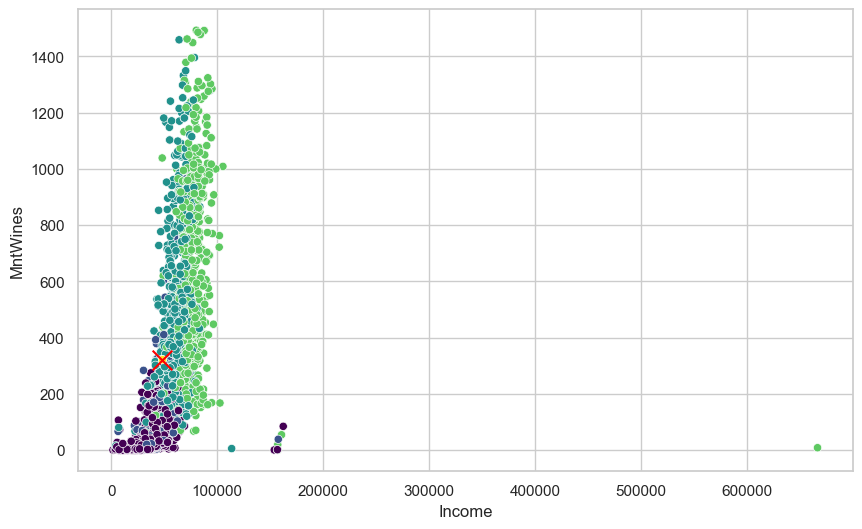

In [30]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', palette='viridis', data=data, legend=False)
plt.scatter(cluster_means.loc[target_segment, 'Income'], cluster_means.loc[target_segment, 'MntWines'], c='red', marker='x', s=200, label='Target Segment')
